<a href="https://colab.research.google.com/github/KhalelAlbuquerque/web2-galeria/blob/main/final_TRABALHO_FINAL_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import dask.dataframe as dd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [ ]:
%%time

# set csv data folder path
# csv_data_folder = '/content/drive/MyDrive/Last_1M_Crimes.csv'
csv_data_folder = '/content/drive/MyDrive/Crimes_-_2001_to_Present.csv'
print('Carregando base de dados...')

# Carregar dados CSV em um DataFrame do pandas
# allcrimes = pd.read_csv(csv_data_folder)

# # Converter a coluna 'Date' para o formato datetime
# allcrimes['Date'] = pd.to_datetime(allcrimes['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# # Filtrar o DataFrame para incluir apenas ocorrências a partir de 2019
# crimes = allcrimes[allcrimes['Date'].dt.year >= 2019]

crimes = pd.read_csv(csv_data_folder)

print(crimes)

Carregando base de dados...
               ID Case Number                    Date  \
0         5741943    HN549294  08/25/2007 09:22:18 AM   
1           25953    JE240540  05/24/2021 03:06:00 PM   
2           26038    JE279849  06/26/2021 09:24:00 AM   
3        13279676    JG507211  11/09/2023 07:30:00 AM   
4        13274752    JG501049  11/12/2023 07:59:00 AM   
...           ...         ...                     ...   
7949566  13047495    JG229914  04/18/2023 08:00:00 AM   
7949567  13168300    JG373901  08/07/2023 06:00:00 PM   
7949568  13114024    JG309527  06/20/2023 07:00:00 PM   
7949569  13188860    JG398340  08/26/2023 12:00:00 AM   
7949570  13126372    JG324067  07/01/2023 07:29:00 PM   

                             Block  IUCR         Primary Type  \
0               074XX N ROGERS AVE  0560              ASSAULT   
1              020XX N LARAMIE AVE  0110             HOMICIDE   
2            062XX N MC CORMICK RD  0110             HOMICIDE   
3                 019XX W B

In [ ]:
%%time

print('Estatísticas dos dados de crimes em Chicago:')
print('{} registros totais'.format(len(crimes)))

Estatísticas dos dados de crimes em Chicago:
7949571 registros totais
CPU times: user 1.58 ms, sys: 0 ns, total: 1.58 ms
Wall time: 1.6 ms


In [ ]:
crimes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,False,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,11/25/2023 03:41:03 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7949566,13047495,JG229914,04/18/2023 08:00:00 AM,003XX N JEFFERSON ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,42.0,28.0,11,1172269.0,1902384.0,2023,08/19/2023 03:40:26 PM,41.887589,-87.642827,"(41.887589411, -87.642826595)"
7949567,13168300,JG373901,08/07/2023 06:00:00 PM,0000X W 95TH ST,031A,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,...,9.0,49.0,03,1177527.0,1841973.0,2023,08/19/2023 03:40:26 PM,41.721698,-87.625345,"(41.72169837, -87.625345212)"
7949568,13114024,JG309527,06/20/2023 07:00:00 PM,031XX S AVERS AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,22.0,30.0,07,1151205.0,1883542.0,2023,08/19/2023 03:40:26 PM,41.836324,-87.720674,"(41.836323827, -87.720674149)"
7949569,13188860,JG398340,08/26/2023 12:00:00 AM,078XX S SOUTH SHORE DR,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,7.0,46.0,14,1198338.0,1853426.0,2023,09/02/2023 03:41:45 PM,41.752631,-87.548737,"(41.752631346, -87.548737069)"


In [ ]:
%%time

crimes.head(5)

CPU times: user 160 µs, sys: 34 µs, total: 194 µs
Wall time: 199 µs


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,False,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,11/25/2023 03:41:03 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"


In [ ]:
%%time

crime_types = crimes[['Primary Type']]

# Contantdo quantos tem de cada tipo
crime_type_total = crime_types.groupby('Primary Type').size()

# Separando crimes por doméstica e prisões
crime_type_counts = crimes[['Primary Type', 'Arrest', 'Domestic']].groupby('Primary Type').sum()

# Coluna mostrando total de crimes
crime_type_counts['Total'] = crime_type_total

print(crime_type_counts.sort_values(by='Total', ascending=False))

                                   Arrest  Domestic    Total
Primary Type                                                
THEFT                              185340     59073  1678238
BATTERY                            317425    769098  1451073
CRIMINAL DAMAGE                     60130    103256   906203
NARCOTICS                          746060       605   750756
ASSAULT                            109235    153119   521630
OTHER OFFENSE                       86493    183355   493161
BURGLARY                            24511      5025   428967
MOTOR VEHICLE THEFT                 31416      3142   393296
DECEPTIVE PRACTICE                  46756      5710   355811
ROBBERY                             27723      6341   299633
CRIMINAL TRESPASS                  151036     10998   217132
WEAPONS VIOLATION                   81994       671   111895
PROSTITUTION                        69670        29    69955
OFFENSE INVOLVING CHILDREN          11211     42291    56935
PUBLIC PEACE VIOLATION  

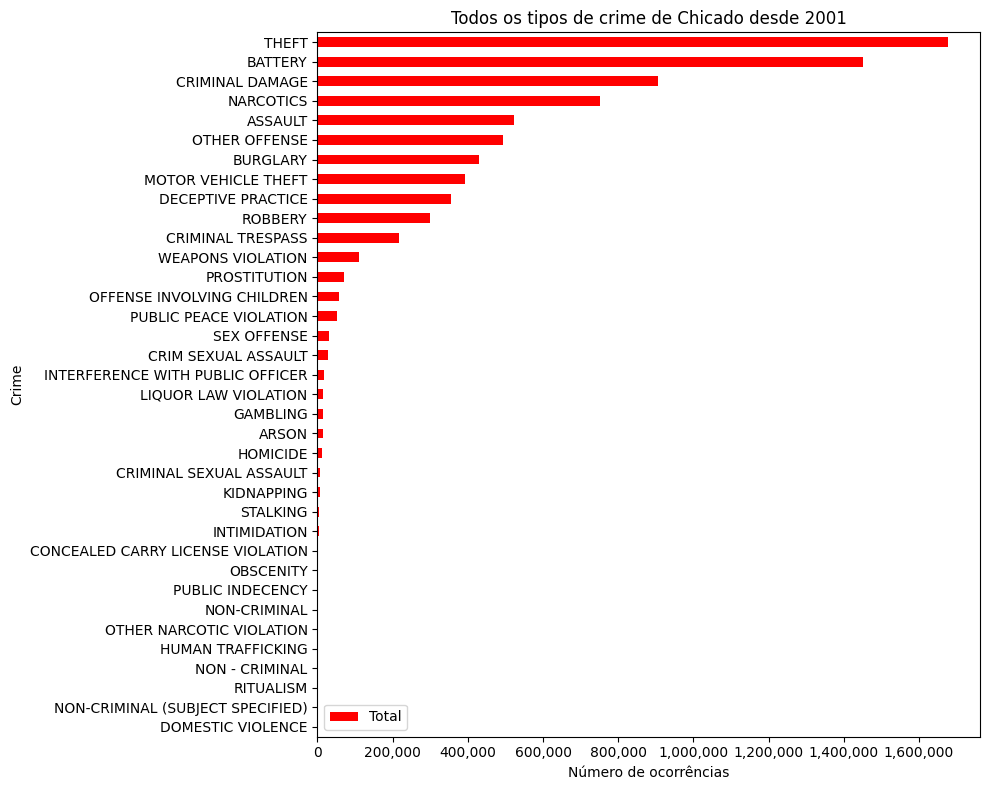

In [ ]:
# Plotando gráfico com as informações acima
all_crime_types = crime_type_counts.sort_values(by='Total', ascending=True).drop(['Arrest', 'Domestic'], axis=1)
all_crime_types.plot(kind='barh', figsize=(10,8), color='red')
plt.title('Todos os tipos de crime de Chicado desde 2001')
plt.xlabel('Número de ocorrências')
plt.ylabel('Crime')
plt.tight_layout()
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [ ]:
# Crimes narcóticos
narcotics = crimes[crimes['Primary Type']=='NARCOTICS']

# Organizando e contando pelas descrições
narcotics_crimes = narcotics[['Primary Type', 'Description']].groupby('Description').count().sort_values(by='Primary Type', ascending=False)

print(narcotics_crimes)

# print(narcotics_crimes.head(10))
# print('...')
print('Total de tipos de crime por narcóticos {}'.format(len(narcotics_crimes)))

                                                  Primary Type
Description                                                   
POSS: CANNABIS 30GMS OR LESS                            278135
POSS: CRACK                                             121109
POSS: HEROIN(WHITE)                                      95786
SOLICIT NARCOTICS ON PUBLICWAY                           27854
MANU/DELIVER: HEROIN (WHITE)                             26445
...                                                        ...
MANUFACTURE / DELIVER - HEROIN (BLACK TAR)                   3
MANUFACTURE / DELIVER - SYNTHETIC MARIJUANA                  3
POSSESS - HYPODERMIC NEEDLE                                  1
POSSESS - LOOK-ALIKE DRUGS                                   1
DELIVER CONTROLLED SUBSTANCES TO PERSON UNDER 18             1

[82 rows x 1 columns]
Total de tipos de crime por narcóticos 82


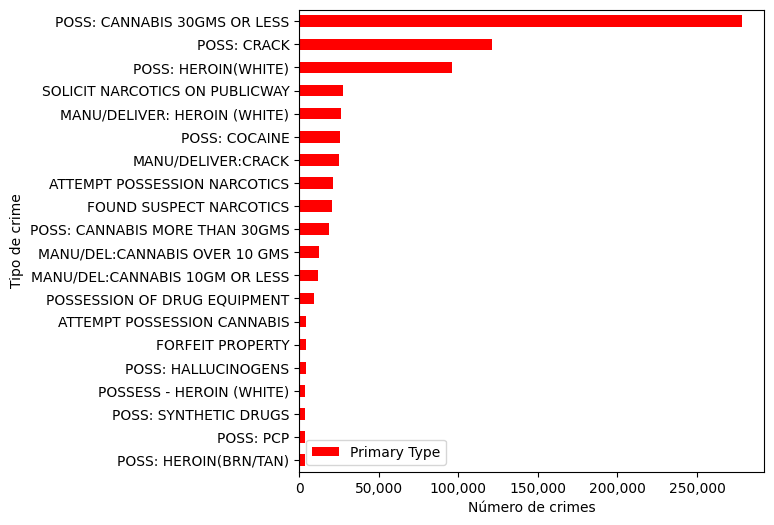

In [ ]:
# Top 20 crimes narcóticos
narcotics_crimes[:20].sort_values(by='Primary Type', ascending=True).plot(kind='barh', figsize=(6,6), color='red')
plt.xlabel('Número de crimes')
plt.ylabel('Tipo de crime')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [ ]:
# Crimes de ofensa
other_offenses = crimes[crimes['Primary Type']=='OTHER OFFENSE']

# Contagem por descrições
other_offense_crimes = other_offenses[['Primary Type', 'Description']].groupby('Description').count().sort_values(by='Primary Type', ascending=False)

print(other_offense_crimes)
# print(other_offense_crimes.head(10))
# print('...')
print('Total de tipos de crimes por ofensa: {}'.format(len(other_offense_crimes)))

                                            Primary Type
Description                                             
TELEPHONE THREAT                                  152144
HARASSMENT BY TELEPHONE                           112741
VIOLATE ORDER OF PROTECTION                        42040
OTHER VEHICLE OFFENSE                              41583
HARASSMENT BY ELECTRONIC MEANS                     36160
...                                                  ...
ARSONIST: FAIL TO REGISTER NEW ADDRESS                 3
ARSONIST: DUTY TO REGISTER                             3
SEX OFFENDER - PROHIBITED ZONE                         2
DISCLOSE DV VICTIM LOCATION                            1
DISCLOSE DOMESTIC VIOLENCE VICTIM LOCATION             1

[64 rows x 1 columns]
Total de tipos de crimes por ofensa: 64


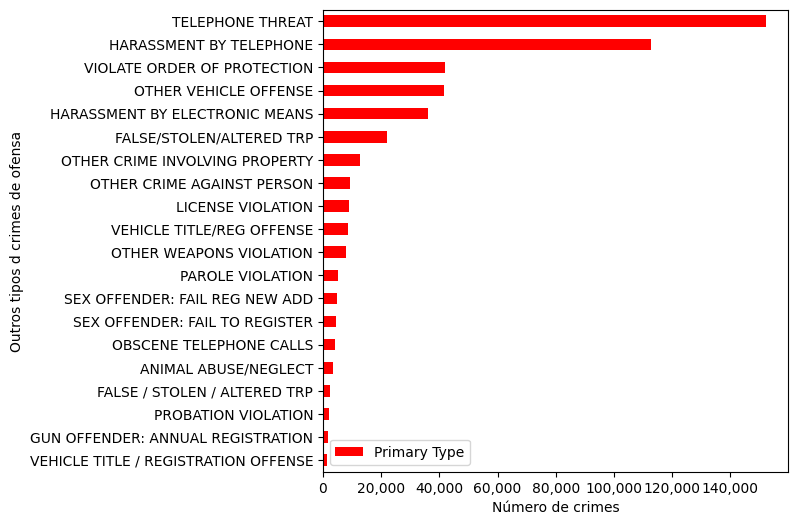

In [ ]:
# Crimes de ofensa
other_offense_crimes[:20].sort_values(by='Primary Type', ascending=True).plot(kind='barh', figsize=(6,6), color='red')
plt.xlabel('Número de crimes')
plt.ylabel('Outros tipos d crimes de ofensa')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

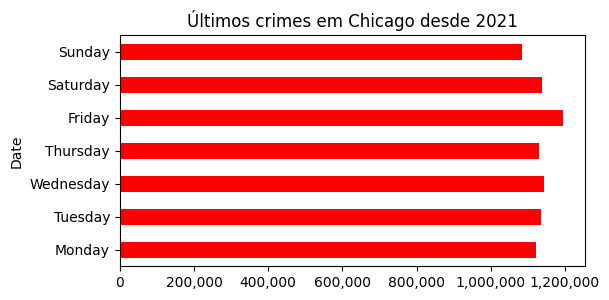

In [ ]:
crimes['Date'] = pd.to_datetime(crimes['Date'], format="%m/%d/%Y %I:%M:%S %p")
crimes.set_index('Date', inplace=True)

# Plotando os crimes de acordo com o dia na semana
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes.groupby(crimes.index.dayofweek).size().plot(kind='barh', figsize=(6, 3), color='red')

plt.title('Últimos crimes em Chicago desde 2021')
plt.yticks(np.arange(7), days)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

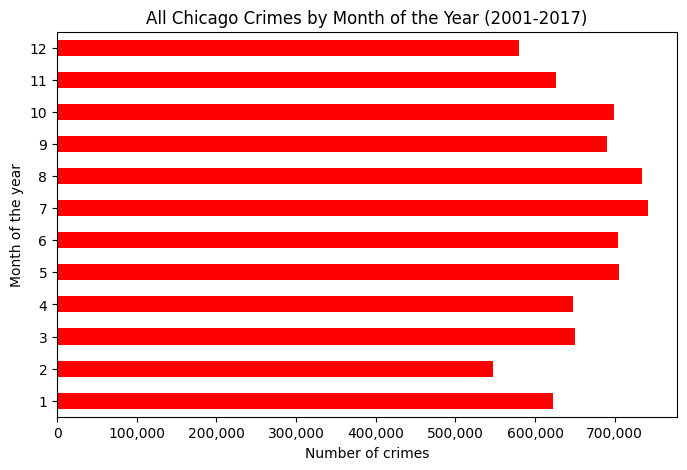

In [ ]:
# Plotando crimes pelo mês do ano
crimes.groupby([crimes.index.month]).size().plot(kind='barh', figsize=(8,5), color='red')
plt.title('All Chicago Crimes by Month of the Year (2001-2017)')
plt.xlabel('Number of crimes')
plt.ylabel('Month of the year')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [ ]:
%%time
from datetime import datetime
crimes.reset_index(inplace=True)
print(crimes["Date"])


crime_types['Date'] = crimes['Date']

crime_types['Date'] = pd.to_datetime(crime_types['Date'])

# Setando a data como index
crime_types.set_index('Date', inplace=True)

monthly_crime = crime_types.resample('M').count()

print('---------------------------------------')
print(monthly_crime.head())
print('Total de meses: {:,}'.format(monthly_crime.size))

def printar_status(dtframe, title):
    print('\n{}\n---------------------------------------'.format(title))
    print(dtframe.head())
    print('...\nTotal {}: {:,}'.format(title, dtframe.size))

arrests = crimes[crimes['Arrest'] == True][['Arrest', 'Date']]
printar_status(arrests, 'Arrests')

domestic = crimes[crimes['Domestic'] == True][['Domestic',  'Date']]
printar_status(domestic, 'Domestic')

0         2007-08-25 09:22:18
1         2021-05-24 15:06:00
2         2021-06-26 09:24:00
3         2023-11-09 07:30:00
4         2023-11-12 07:59:00
                  ...        
7949566   2023-04-18 08:00:00
7949567   2023-08-07 18:00:00
7949568   2023-06-20 19:00:00
7949569   2023-08-26 00:00:00
7949570   2023-07-01 19:29:00
Name: Date, Length: 7949571, dtype: datetime64[ns]


<timed exec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


---------------------------------------
            Primary Type
Date                    
2001-01-31         38120
2001-02-28         33788
2001-03-31         40568
2001-04-30         40091
2001-05-31         41839
Total de meses: 275

Arrests
---------------------------------------
    Arrest                Date
1     True 2021-05-24 15:06:00
2     True 2021-06-26 09:24:00
5     True 2002-01-05 21:24:00
25    True 2020-10-30 16:30:00
26    True 2021-04-17 15:20:00
...
Total Arrests: 4,108,688

Domestic
---------------------------------------
    Domestic                Date
16      True 2023-08-11 11:00:00
23      True 2023-11-10 11:00:00
25      True 2020-10-30 16:30:00
27      True 2020-10-01 00:01:00
28      True 2011-08-10 00:01:00
...
Total Domestic: 2,731,772
CPU times: user 8.74 s, sys: 1.52 s, total: 10.3 s
Wall time: 10.3 s


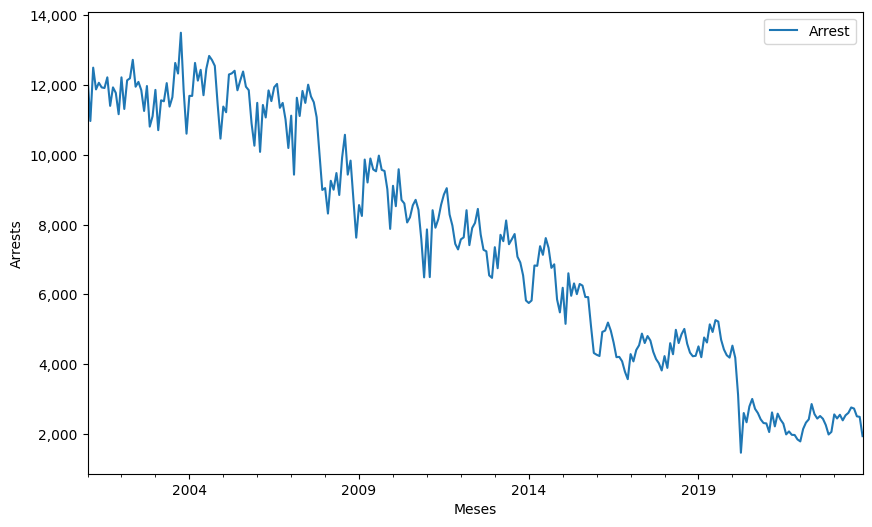

In [ ]:
# Converter a coluna 'Date' para tipo de data
arrests['Date'] = pd.to_datetime(arrests['Date'])

# Definir a coluna 'Date' como o índice
arrests.set_index('Date', inplace=True)

monthly_arrests = arrests.resample('M').sum()

monthly_arrests.plot(figsize=(10, 6))
plt.xlabel('Meses')
plt.ylabel('Arrests')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()


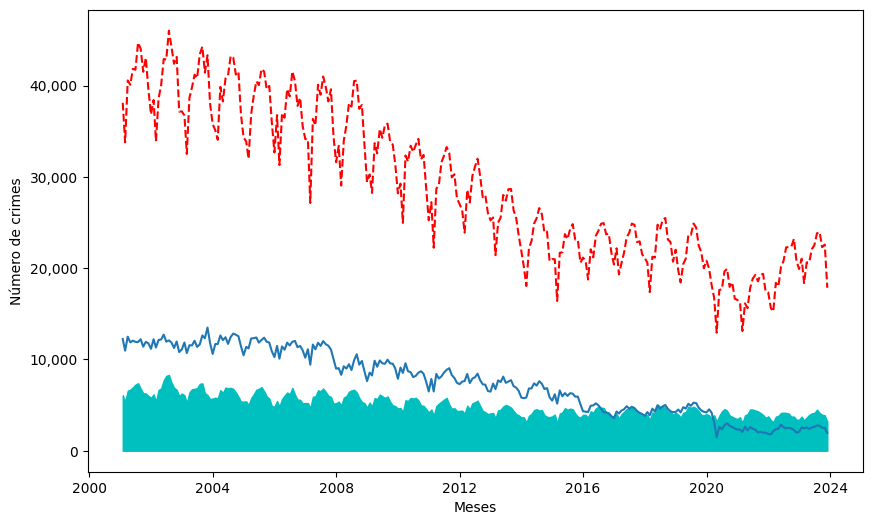

In [ ]:
# Crimes domésticos por mês

domestic['Date'] = pd.to_datetime(domestic['Date'])

# Definir a coluna 'Date' como o índice
domestic.set_index('Date', inplace=True)

monthly_domestic = domestic.resample('M').sum()
monthly_domestic_values = monthly_domestic['Domestic'].values

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(monthly_crime.index, monthly_crime, '--', label='Total', color='red')
ax.plot(monthly_arrests.index, monthly_arrests, zorder=10)
ax.fill_between(monthly_domestic.index, monthly_domestic_values, label='Domestic', color='c')
ax.set_xlabel('Meses')
ax.set_ylabel('Número de crimes')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [ ]:
# Selecionando os maiores tipos de crime
top_crime_types = crime_type_counts[crime_type_counts['Total'] >= 100000].sort_values(by='Total', ascending=False)
top_crime_types.head()

,Arrest,Domestic,Total
Primary Type,,,
THEFT,185340,59073,1678238
BATTERY,317425,769098,1451073
CRIMINAL DAMAGE,60130,103256,906203
NARCOTICS,746060,605,750756
ASSAULT,109235,153119,521630


In [ ]:
%%time
print('Top crimes por mêsh...')

#
top_crimes = crime_types[(crime_types['Primary Type']=='THEFT') | \
                         (crime_types['Primary Type']=='BATTERY') | \
                         (crime_types['Primary Type']=='CRIMINAL DAMAGE') | \
                         (crime_types['Primary Type']=='NARCOTICS') | \
                         (crime_types['Primary Type']=='OTHER OFFENSE') | \
                         (crime_types['Primary Type']=='ASSAULT') | \
                         (crime_types['Primary Type']=='BURGLARY') | \
                         (crime_types['Primary Type']=='MOTOR VEHICLE THEFT') | \
                         (crime_types['Primary Type']=='ROBBERY') | \
                         (crime_types['Primary Type']=='DECEPTIVE PRACTICE')]

# Agrupando por mês e contagem de quantidade
crimes_groupby = top_crimes.groupby([top_crimes.index.to_period('M'), 'Primary Type'])
top_crime_data = crimes_groupby['Primary Type'].count().rename('Count')
print(top_crime_data.head(10))
print('...')

# Desaclopando os dados pra analisar no bloco abaixo
top_crime_data = top_crime_data.unstack()
print(top_crime_data.head(2))
print('...')


Top crimes por mêsh...
Date     Primary Type       
2001-01  ASSAULT                2123
         BATTERY                6527
         BURGLARY               1934
         CRIMINAL DAMAGE        3966
         DECEPTIVE PRACTICE     1398
         MOTOR VEHICLE THEFT    2097
         NARCOTICS              4714
         OTHER OFFENSE          2800
         ROBBERY                1396
         THEFT                  7867
Name: Count, dtype: int64
...
Primary Type  ASSAULT  BATTERY  BURGLARY  CRIMINAL DAMAGE  DECEPTIVE PRACTICE  \
Date                                                                            
2001-01          2123     6527      1934             3966                1398   
2001-02          2029     6042      1666             3665                1163   

Primary Type  MOTOR VEHICLE THEFT  NARCOTICS  OTHER OFFENSE  ROBBERY  THEFT  
Date                                                                         
2001-01                      2097       4714           2800     139

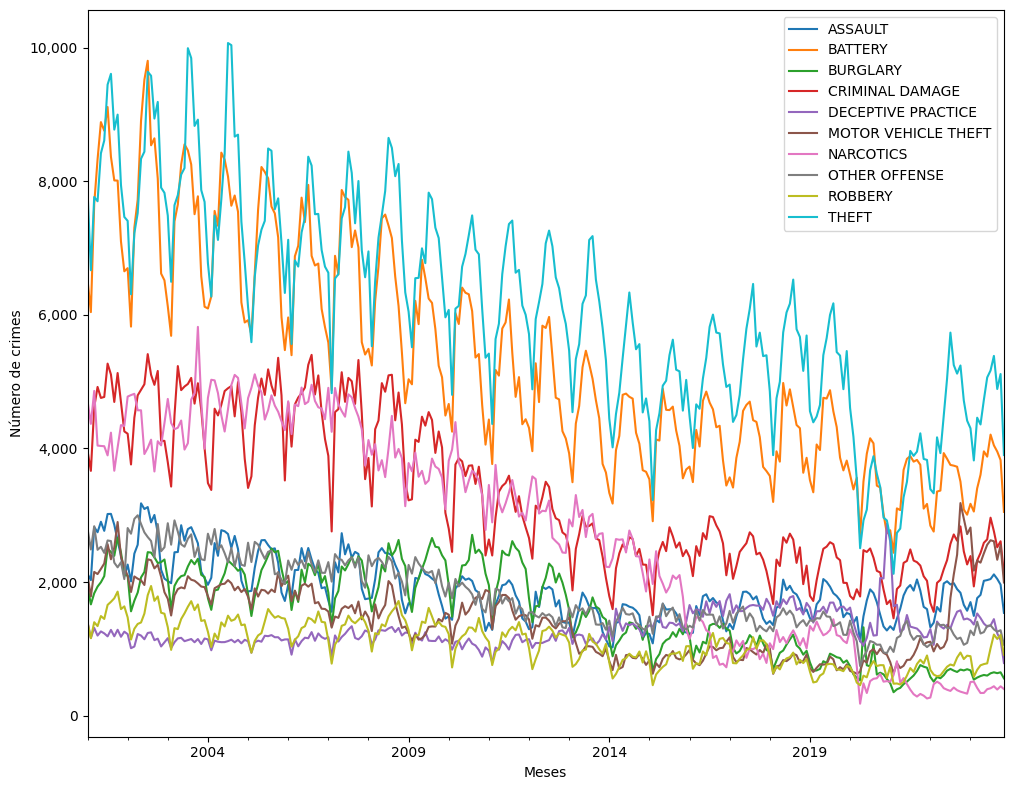

In [ ]:
# Plotando crimes por mês
top_crime_data.plot(figsize=(10,8), cmap='tab10')
plt.legend(loc='upper right', frameon=True)
plt.tight_layout()
plt.xlabel('Meses')
plt.ylabel('Número de crimes')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

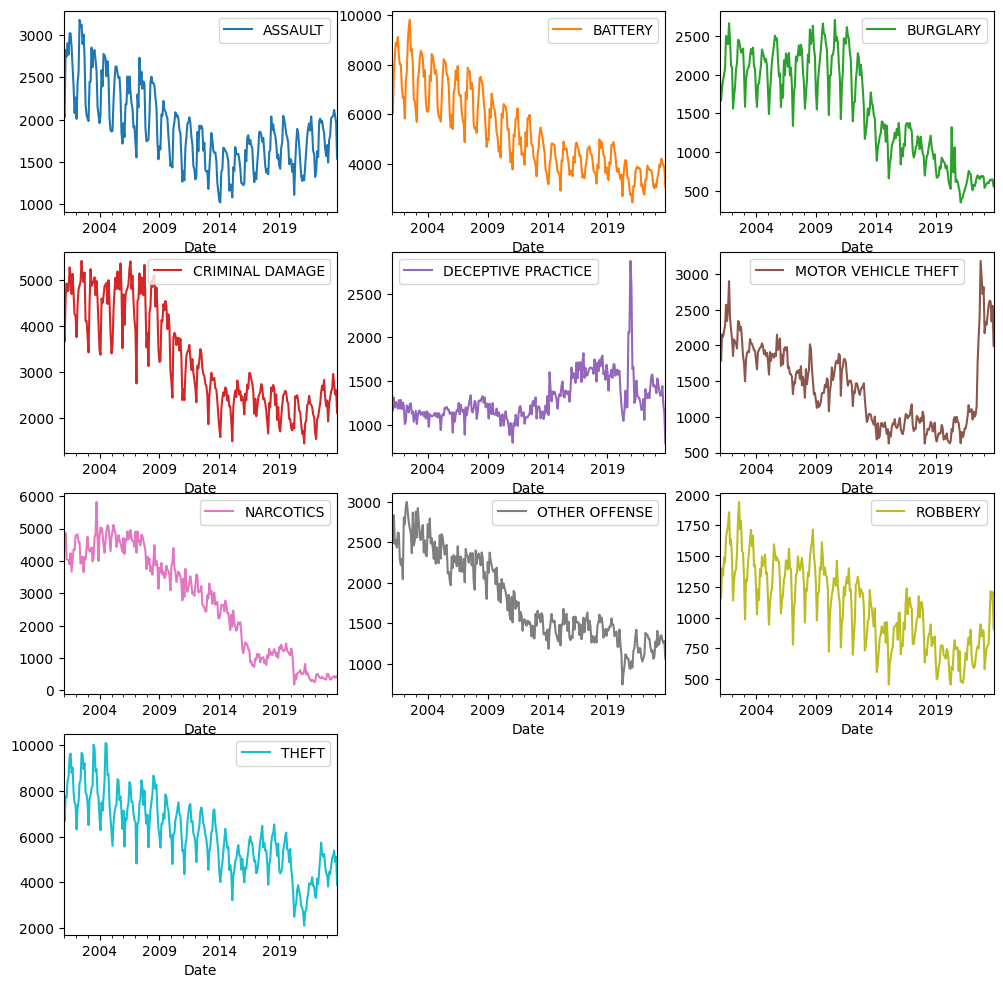

In [ ]:
# Grid com os tipos de crime
top_crime_data.plot(figsize=(12, 12), subplots=True, layout=(-1, 3),\
                    cmap='tab10', sharex=False, sharey=False)
plt.show()

In [ ]:
%%time

# Pegando os status dos crimes
property_crimes = crime_types[(crime_types['Primary Type']=='ARSON') | \
                         (crime_types['Primary Type']=='BURGLARY') | \
                         (crime_types['Primary Type']=='MOTOR VEHICLE THEFT') | \
                         (crime_types['Primary Type']=='THEFT')]

# Agrupando pela propriedade "tipo"
crimes_groupby = property_crimes.groupby([property_crimes.index.to_period('M'), 'Primary Type'])
property_crime_data = crimes_groupby['Primary Type'].count().rename('Count')
print(property_crime_data.head(10))
print('...')

# Desaclopando os dados pra analise
property_crime_data = property_crime_data.unstack()
print(property_crime_data.head(2))
print('...')


Date     Primary Type       
2001-01  ARSON                    67
         BURGLARY               1934
         MOTOR VEHICLE THEFT    2097
         THEFT                  7867
2001-02  ARSON                    57
         BURGLARY               1666
         MOTOR VEHICLE THEFT    1785
         THEFT                  6669
2001-03  ARSON                    93
         BURGLARY               1832
Name: Count, dtype: int64
...
Primary Type  ARSON  BURGLARY  MOTOR VEHICLE THEFT  THEFT
Date                                                     
2001-01          67      1934                 2097   7867
2001-02          57      1666                 1785   6669
...
CPU times: user 4.06 s, sys: 36.7 ms, total: 4.09 s
Wall time: 4.15 s


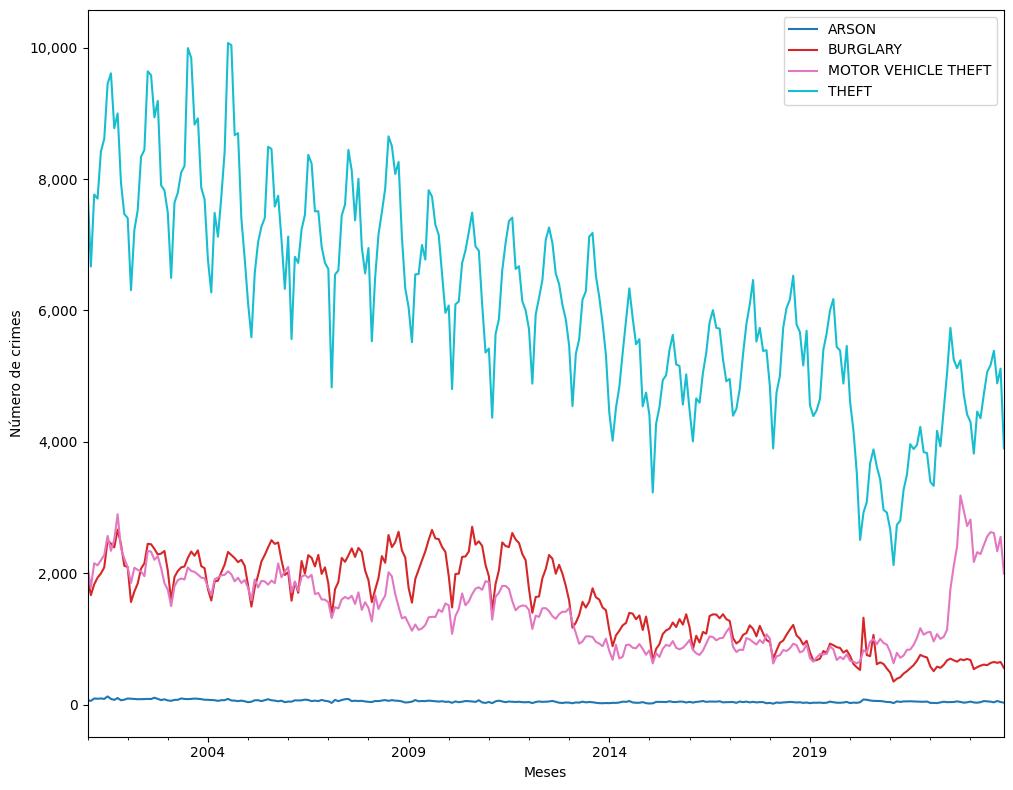

In [ ]:
# Plotando propriedades por mês
property_crime_data.plot(figsize=(10,8), cmap='tab10')
plt.legend(loc='upper right', frameon=True)
plt.tight_layout()
plt.xlabel('Meses')
plt.ylabel('Número de crimes')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

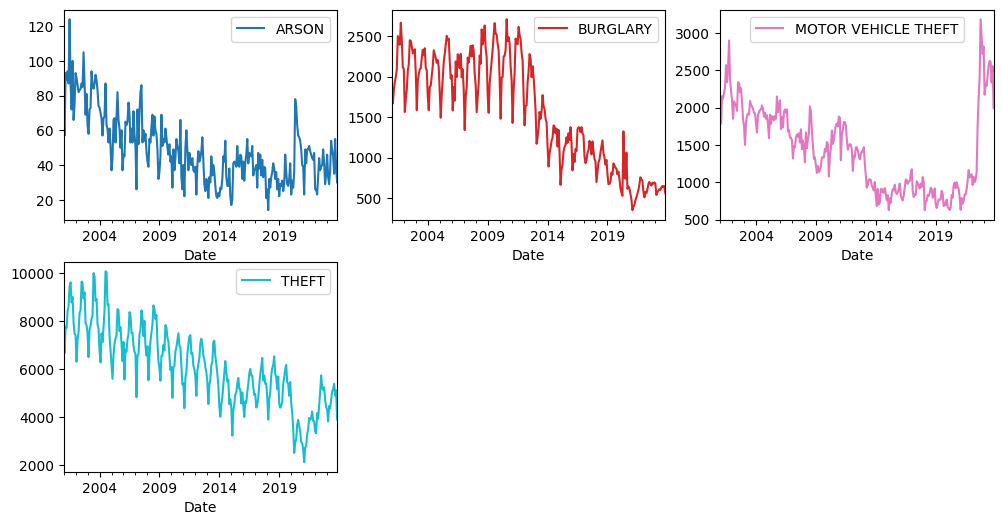

In [ ]:
# Plotando grid
property_crime_data.plot(figsize=(12, 6), subplots=True, layout=(-1, 3),\
                    cmap='tab10', sharex=False, sharey=False)
plt.show()

In [ ]:
%%time
print('Crimes contra a qualidade de vida')

# Pegando os top crimes
q_of_life_crimes = crime_types[(crime_types['Primary Type']=='CRIMINAL DAMAGE') | \
                         (crime_types['Primary Type']=='NARCOTICS') | \
                         (crime_types['Primary Type']=='PROSTITUTION')]

# Agrupando por meses e tipo
crimes_groupby = q_of_life_crimes.groupby([q_of_life_crimes.index.to_period('M'), 'Primary Type'])
q_of_life_crime_data = crimes_groupby['Primary Type'].count().rename('Count')
print(q_of_life_crime_data.head(10))
print('...')

# Desaclopando pra análise
q_of_life_crime_data = q_of_life_crime_data.unstack()
print(q_of_life_crime_data.head(2))
print('...')


Crimes contra a qualidade de vida
Date     Primary Type   
2001-01  CRIMINAL DAMAGE    3966
         NARCOTICS          4714
         PROSTITUTION        563
2001-02  CRIMINAL DAMAGE    3665
         NARCOTICS          4369
         PROSTITUTION        426
2001-03  CRIMINAL DAMAGE    4617
         NARCOTICS          4862
         PROSTITUTION        550
2001-04  CRIMINAL DAMAGE    4922
Name: Count, dtype: int64
...
Primary Type  CRIMINAL DAMAGE  NARCOTICS  PROSTITUTION
Date                                                  
2001-01                3966.0     4714.0         563.0
2001-02                3665.0     4369.0         426.0
...
CPU times: user 2.96 s, sys: 16.3 ms, total: 2.98 s
Wall time: 3.04 s


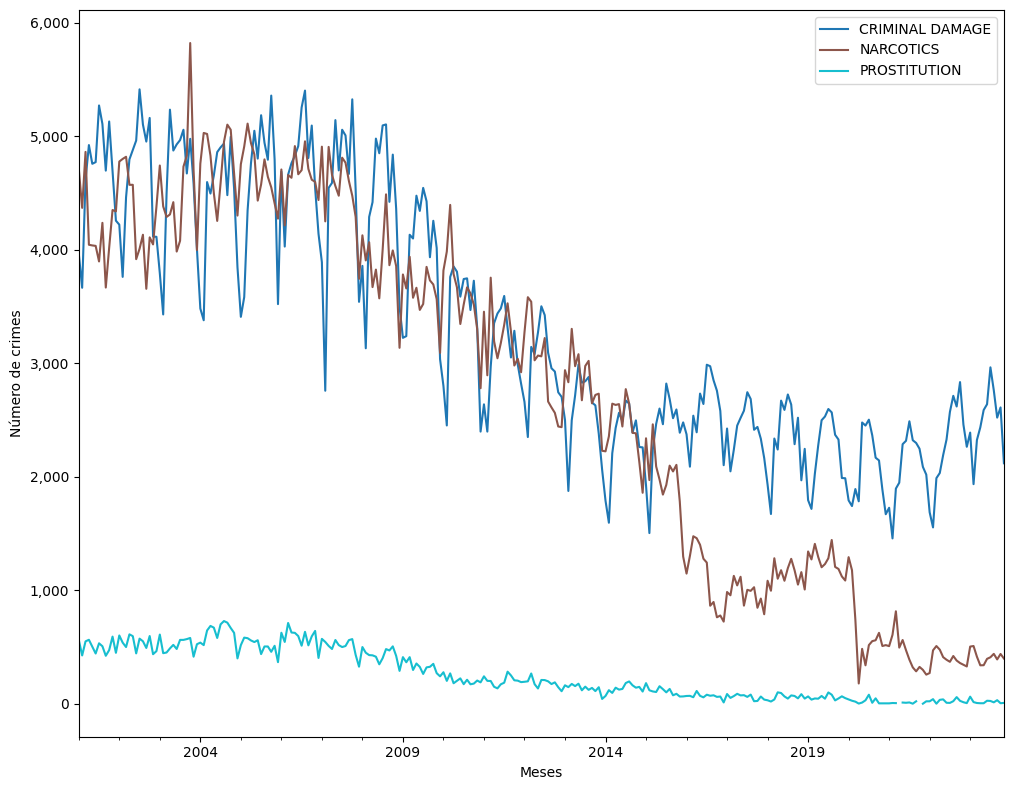

In [ ]:
# Plotando os gráficos acima
q_of_life_crime_data.plot(figsize=(10,8), cmap='tab10')
plt.legend(loc='upper right', frameon=True)
plt.tight_layout()
plt.xlabel('Meses')
plt.ylabel('Número de crimes')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

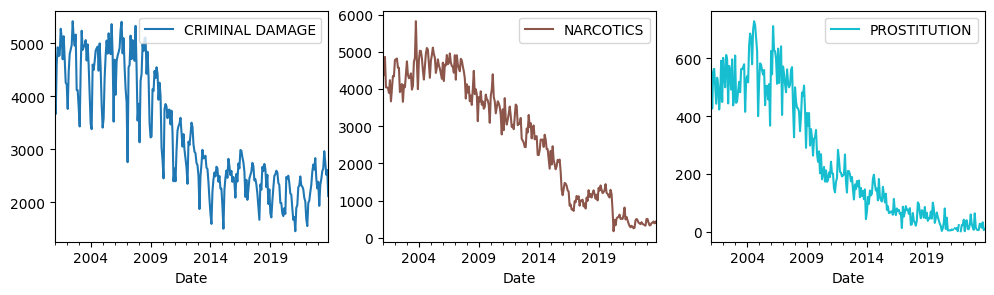

In [ ]:
# Plotando grid
q_of_life_crime_data.plot(figsize=(12, 3), subplots=True, layout=(-1, 3),\
                    cmap='tab10', sharex=False, sharey=False)
plt.show()

In [ ]:
# Pegando crimes pela localização
crime_locations = crimes.groupby('Location Description').size()
crime_locations = crime_locations.sort_values(ascending=False).rename('Total')

print(crime_locations.head())
print("...\nTotal: {:,}".format(crime_locations.size))

Location Description
STREET       2075934
RESIDENCE    1325655
APARTMENT     909124
SIDEWALK      737842
OTHER         270022
Name: Total, dtype: int64
...
Total: 217


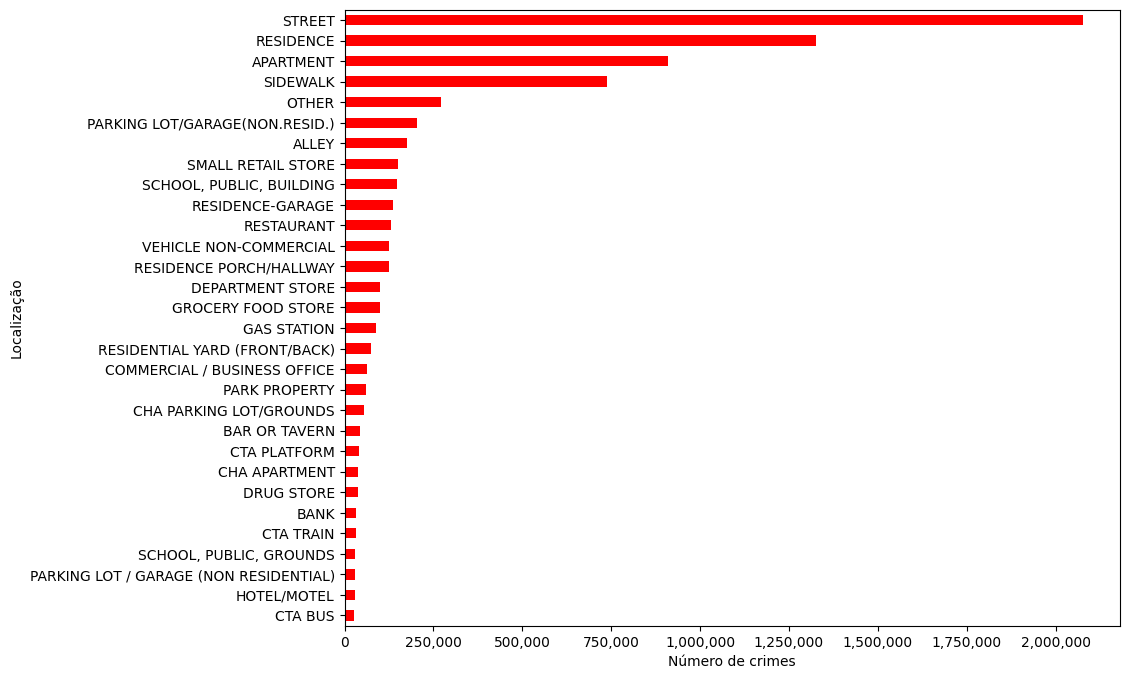

In [ ]:
# Plotando top 30
crime_locations[:30].sort_values(ascending=True)\
.plot(kind='barh', figsize=(10,8), color='red')
plt.xlabel('Número de crimes')
plt.ylabel('Localização')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [ ]:
# Carregando base de dados sobre comunidades em chicago
community_areas = pd.read_csv('/content/drive/MyDrive/CommAreas.csv')
community_areas.head()

# Pegando total de areas (comunidade)
community_areas['Total'] = crimes.groupby('Community Area').size().rename('Total')
community_crime = community_areas.sort_values(by='Total', ascending=False).dropna()

print(community_crime.head())
print("...\nTotal: {:,}".format(community_crime.Total.count()))

                                             the_geom  PERIMETER  AREA  \
25  MULTIPOLYGON (((-87.78941511405804 41.91751009...          0     0   
8   MULTIPOLYGON (((-87.57714456891335 41.78614641...          0     0   
43  MULTIPOLYGON (((-87.65611232131043 41.82331366...          0     0   
23  MULTIPOLYGON (((-87.69157000948773 41.88819563...          0     0   
28  MULTIPOLYGON (((-87.6375883858287 41.886234136...          0     0   

    COMAREA_  COMAREA_ID  AREA_NUMBE       COMMUNITY  AREA_NUM_1  \
25         0           0          25          AUSTIN          25   
8          0           0          42        WOODLAWN          42   
43         0           0          59   MCKINLEY PARK          59   
23         0           0          23   HUMBOLDT PARK          23   
28         0           0          28  NEAR WEST SIDE          28   

      SHAPE_AREA     SHAPE_LEN   Total  
25  1.992542e+08  75226.474917  456166  
8   5.781518e+07  46936.959244  259728  
43  3.943180e+07  26014

In [ ]:
community_crime = community_crime.drop(['AREA_NUM_1'], axis=1)
community_crime = community_crime.set_index('COMMUNITY')
community_crime.head()

,the_geom,PERIMETER,AREA,COMAREA_,COMAREA_ID,AREA_NUMBE,SHAPE_AREA,SHAPE_LEN,Total
COMMUNITY,,,,,,,,,
AUSTIN,MULTIPOLYGON (((-87.78941511405804 41.91751009...,0,0,0,0,25,1.992542e+08,75226.474917,456166
WOODLAWN,MULTIPOLYGON (((-87.57714456891335 41.78614641...,0,0,0,0,42,5.781518e+07,46936.959244,259728
MCKINLEY PARK,MULTIPOLYGON (((-87.65611232131043 41.82331366...,0,0,0,0,59,3.943180e+07,26014.096837,241770
HUMBOLDT PARK,MULTIPOLYGON (((-87.69157000948773 41.88819563...,0,0,0,0,23,1.004809e+08,48583.064330,228447
NEAR WEST SIDE,MULTIPOLYGON (((-87.6375883858287 41.886234136...,0,0,0,0,28,1.584925e+08,53003.592941,223427


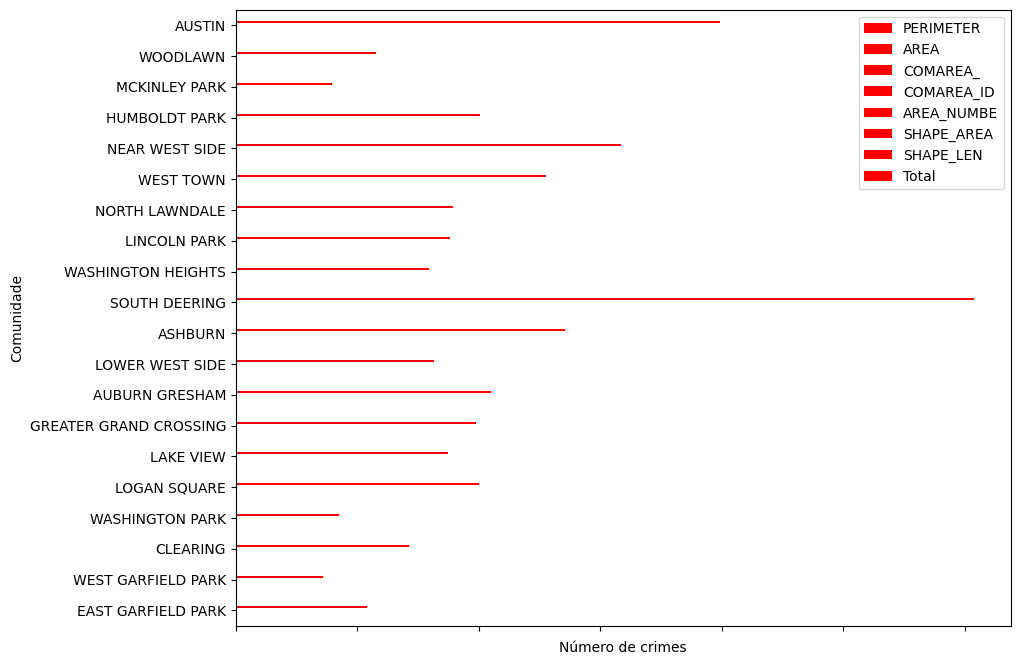

In [ ]:
# Top comunidades
community_crime.head(20).sort_values(by='Total', ascending=True).plot(kind='barh', figsize=(10,8), color='red')
plt.xlabel('Número de crimes')
plt.ylabel('Comunidade')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

Top quadras com mais crimes em Deering
Block
016XX E 95TH ST           1349
103XX S DOTY AVE E        1252
022XX E 103RD ST           931
109XX S DOTY AVE E         821
020XX E 95TH ST            805
095XX S CONSTANCE AVE      760
017XX E 95TH ST            756
019XX E 95TH ST            752
095XX S JEFFERY AVE        731
105XX S YATES AVE          703
105XX S OGLESBY AVE        660
106XX S BENSLEY AVE        639
097XX S MERRION AVE        587
106XX S YATES AVE          572
106XX S OGLESBY AVE        517
108XX S HOXIE AVE          494
099XX S CRANDON AVE        463
103XX S TORRENCE AVE       445
025XX E 106TH ST           426
095XX S COMMERCIAL AVE     413
dtype: int64
...
Total: 481


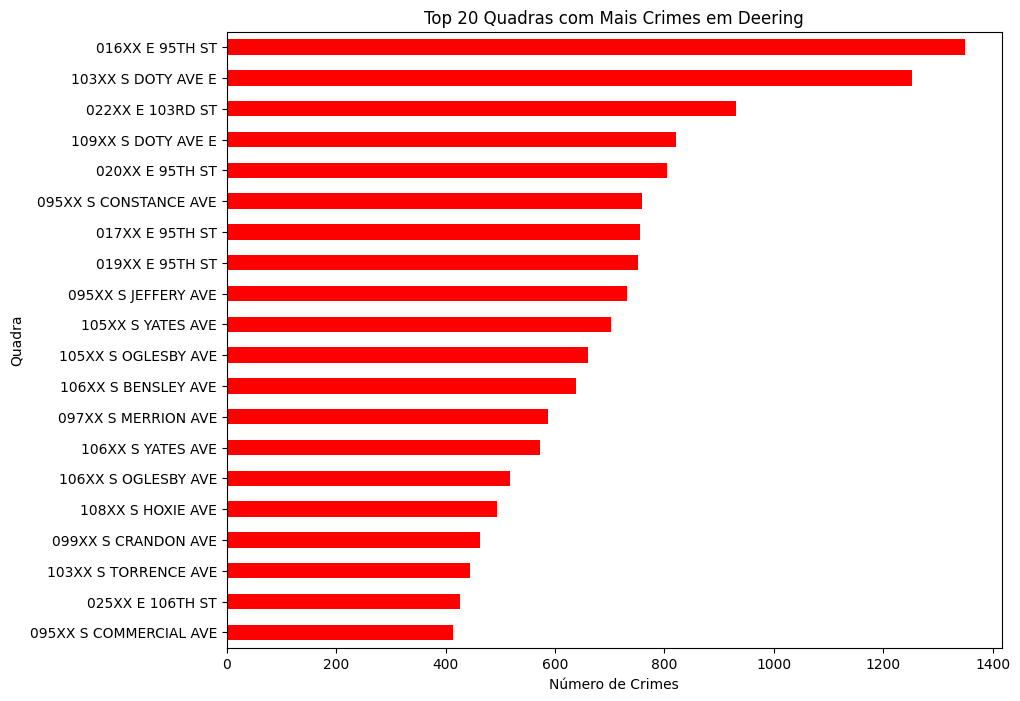

In [ ]:
# Estudando base de dados Deering pra ver por que tem mt
Deering_crime = crimes[crimes['Community Area']==51].drop(['Community Area', 'Year'], axis=1)

# Pegando crimes da comunidade por quadras
Deering_crime_blocks = Deering_crime[['Block']].groupby('Block').size().sort_values(ascending=False)

print('Top quadras com mais crimes em Deering')
print(Deering_crime_blocks.head(20))
print('...\nTotal: {}'.format(len(Deering_crime_blocks)))

plt.figure(figsize=(10, 8))
Deering_crime_blocks.head(20).sort_values().plot(kind='barh', color='red')
plt.title('Top 20 Quadras com Mais Crimes em Deering')
plt.xlabel('Número de Crimes')
plt.ylabel('Quadra')
plt.show()

In [ ]:
# Converter a coluna 'Date' para tipo de date
Deering_crime['Date'] = pd.to_datetime(Deering_crime['Date'])

# Agrupar por tipo de crime
Deering_crime_by_type = Deering_crime.groupby('Primary Type').size().rename('Total').sort_values(ascending=False)

print('Total de crimes por tipo pela comunidade de Deering:')
print(Deering_crime_by_type)

print('\nTop crimes de comunidade em Deering:')
print(Deering_crime_by_type.index[:24])

# Filtrando os top 20 crimes em Deering
top_crimes = Deering_crime[Deering_crime['Primary Type'].isin(Deering_crime_by_type.index[:20])]

# Agrupar por mês e tipo de crime, contando o número de ocorrências
crimes_groupby = top_crimes.groupby([top_crimes['Date'].dt.to_period("M"), 'Primary Type'])
Deering_crime_data = crimes_groupby.size().rename('Count').reset_index()

print('\nCrimes pela comunidade de Deering por mes:')
print(Deering_crime_data.head(10))
print('...')

Total de crimes por tipo pela comunidade de austin:
Primary Type
BATTERY                              9052
THEFT                                8997
CRIMINAL DAMAGE                      6733
ASSAULT                              4389
OTHER OFFENSE                        3607
NARCOTICS                            2793
BURGLARY                             2689
MOTOR VEHICLE THEFT                  2519
DECEPTIVE PRACTICE                   2084
ROBBERY                              1592
CRIMINAL TRESPASS                    1344
WEAPONS VIOLATION                     985
OFFENSE INVOLVING CHILDREN            597
PUBLIC PEACE VIOLATION                280
CRIM SEXUAL ASSAULT                   162
INTERFERENCE WITH PUBLIC OFFICER      135
SEX OFFENSE                           132
HOMICIDE                              104
ARSON                                  94
LIQUOR LAW VIOLATION                   71
GAMBLING                               66
KIDNAPPING                             54
STALKING   

In [ ]:
## DANDO ERRO, CORRIGIR

# # Selecionar e plotar as colunas desejadas
# print(Austin_crime_data)
# columns_to_plot = ['THEFT', 'WEAPONS VIOLATION', 'DECEPTIVE PRACTICE']
# Austin_crime_data[columns_to_plot].plot(figsize=(10, 8), cmap='tab10')

# plt.legend(loc='upper right', frameon=True)
# plt.tight_layout()
# plt.xlabel('Meses')
# plt.ylabel('Numero de crimes')

# ax = plt.gca()
# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# plt.show()


(7259, 3)


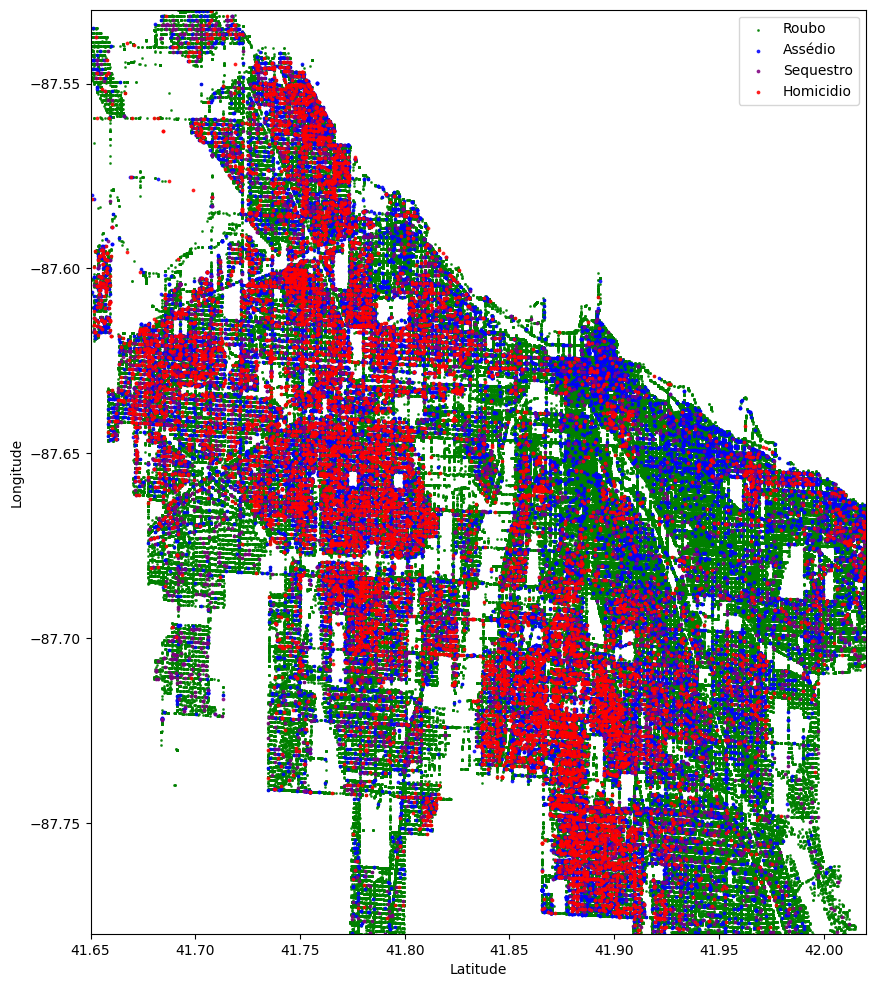

CPU times: user 5.58 s, sys: 188 ms, total: 5.77 s
Wall time: 5.72 s


In [ ]:
%%time

# Pegando maior/menor latitude e longitude pra plotar tamanho do grafico
## Dando erro, arrumar
#minLat = crimes['Latitude'].min()
#maxLat = crimes['Latitude'].max()
#minLong = crimes['Longitude'].min()
#maxLong = crimes['Longitude'].max()

# Dados geograficos
crime_geo = crimes[['Primary Type', 'Latitude', 'Longitude']].dropna() #Tirando valores nulos

# Homicidios
homicides = crime_geo[(crime_geo['Primary Type']=='HOMICIDE')]

# Sequestros
kidnappings = crime_geo[(crime_geo['Primary Type']=='KIDNAPPING')]
print(kidnappings.shape)


# Assédio
sexual_assaults = crime_geo[(crime_geo['Primary Type']=='CRIM SEXUAL ASSAULT')]

# Roub
thefts = crime_geo[(crime_geo['Primary Type']=='THEFT')]


# Criando mapa para plot
fig,ax= plt.subplots(1, 1, figsize=(10,12))
plt.xlim(41.65, 42.02) # (minLat, maxLat) tinha que ser os dados acima, corrigir
plt.ylim(-87.78, -87.53) # (minLong, maxLong) tinha que ser os dados acima, corrigir

# Plotando informações
ax.scatter(thefts['Latitude'], thefts['Longitude'], s=1, alpha=0.8, color='green', label='Roubo')

ax.scatter(sexual_assaults['Latitude'], sexual_assaults['Longitude'], s=3, alpha=0.8, color='blue', label='Assédio')

ax.scatter(kidnappings['Latitude'], kidnappings['Longitude'], s=3, alpha=0.8, color='purple', label='Sequestro')

ax.scatter(homicides['Latitude'], homicides['Longitude'], s=3, alpha=0.8, color='red', label='Homicidio')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(loc='upper right', frameon=True)
plt.show()

(449, 3)


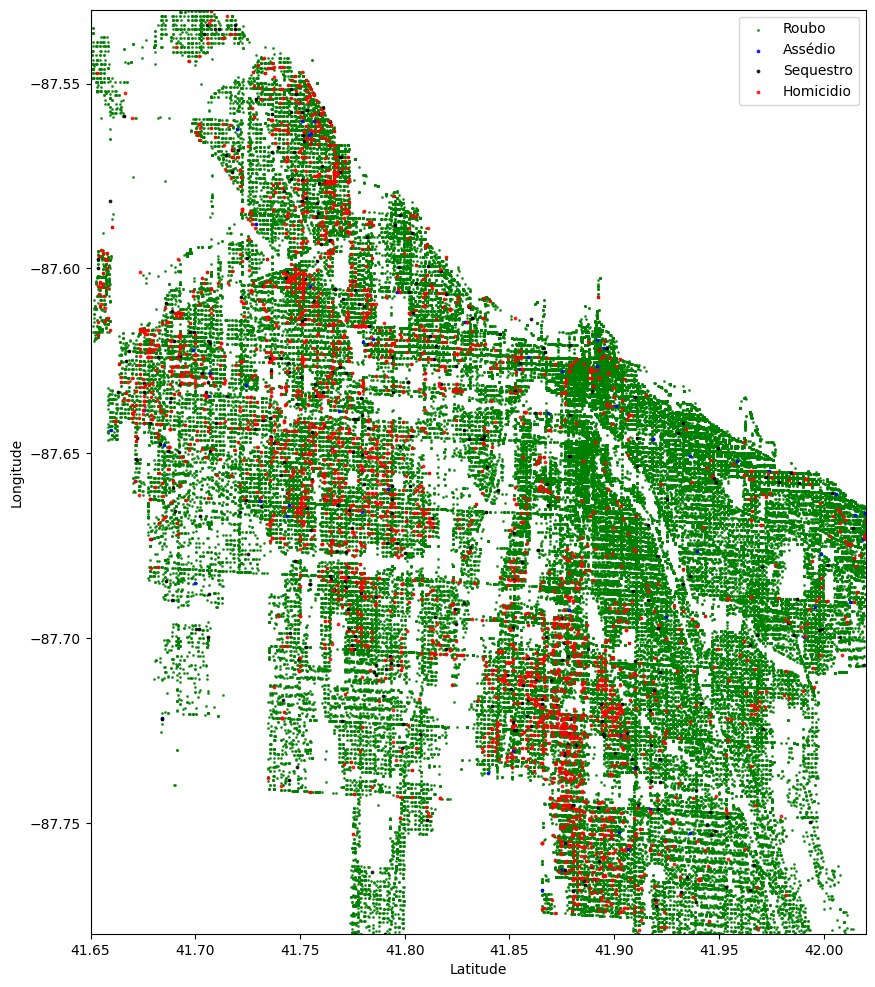

CPU times: user 2.9 s, sys: 51.5 ms, total: 2.95 s
Wall time: 3.09 s


In [ ]:
%%time

# Pegando maior/menor latitude e longitude pra plotar tamanho do grafico
## Dando erro, arrumar
#minLat = crimes['Latitude'].min()
#maxLat = crimes['Latitude'].max()
#minLong = crimes['Longitude'].min()
#maxLong = crimes['Longitude'].max()

# Dados geograficos
crimes['Date'] = pd.to_datetime(crimes['Date'])  # Converte a coluna de data para o formato de data

# Filtra os dados para incluir apenas aqueles com data maior ou igual a 2020
recent_crime_geo = crimes[crimes['Date'].dt.year >= 2020][['Primary Type', 'Latitude', 'Longitude']].dropna() #Tirando valores nulos

# Homicidios
homicides = recent_crime_geo[(recent_crime_geo['Primary Type']=='HOMICIDE')]

# Sequestros
kidnappings = recent_crime_geo[(recent_crime_geo['Primary Type']=='KIDNAPPING')]
print(kidnappings.shape)


# Assédio
sexual_assaults = recent_crime_geo[(recent_crime_geo['Primary Type']=='CRIM SEXUAL ASSAULT')]

# Roub
thefts = recent_crime_geo[(recent_crime_geo['Primary Type']=='THEFT')]


# Criando mapa para plot
fig,ax= plt.subplots(1, 1, figsize=(10,12))
plt.xlim(41.65, 42.02) # (minLat, maxLat) tinha que ser os dados acima, corrigir
plt.ylim(-87.78, -87.53) # (minLong, maxLong) tinha que ser os dados acima, corrigir

# Plotando informações
ax.scatter(thefts['Latitude'], thefts['Longitude'], s=1, alpha=0.8, color='green', label='Roubo')

ax.scatter(sexual_assaults['Latitude'], sexual_assaults['Longitude'], s=3, alpha=0.8, color='blue', label='Assédio')

ax.scatter(kidnappings['Latitude'], kidnappings['Longitude'], s=3, alpha=0.8, color='black', label='Sequestro')

ax.scatter(homicides['Latitude'], homicides['Longitude'], s=3, alpha=0.8, color='red', label='Homicidio')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(loc='upper right', frameon=True)
plt.show()